<a href="https://colab.research.google.com/github/drbarak/Project2_EDA/blob/main/improvedHeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Developed based on the "better heatmap" from

SOURCE: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

See also my notebook "HeatCorrelationBetter"



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import numpy as np
p = print
d = display

In [81]:
n_colors = 256 # Use 256 colors for the diverging color palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette

def value_to_color(val):
    # step 4 - add colors

    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap_static(corr):
    x=corr['x']
    y=corr['y']
    size=corr['value'].abs()
    color=corr.value

    # Step 1
    n = np.sqrt(len(x))
    fig = plt.figure(figsize=(max(4, n), max(4, n / 2)))
    #ax = fig.gca()

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot

    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]

    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )

    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

    # Step 2
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    # Step 3
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

    # Step 5
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 

    plt.show()

## Interactive grpah - point to a square and see the correlation value

### If there is an error during display of the graph, need to update plotly to at least version 4.7:

RuntimeError: dictionary changed size during iteration

So run the next cell, click on it to answer the queation 'Proceed(y/n)?' and enter 'y' and then ENTER, so th eupdate of plotly is done

In [6]:
#!pip uninstall plotly
#!pip install plotly==4.7

In [80]:
import plotly.express as px

def heatmap(df):
    x=df['x']
    y=df['y']
    size=df['value'].abs()
    color=df.value

    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]

    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 

    size_scale = 500

    df['size'] = df.value.abs() * size_scale
    df['x_map'] = df.x.map(x_to_num)
    df['y_map'] = df.y.map(y_to_num)
    df['correlation'] = df.value
    df['symbol'] = 'square'
    labels = {i: x_labels[i] for i in range(0, len(x_labels))}

    fig = px.scatter(df,
        x='x_map', # Use mapping for x
        y='y_map', # Use mapping for y
        size='size',
        color='correlation',
        hover_data={'x_map':False, # remove x, y from hover data
                    'y_map': False,
                    'size': False,
                    'value': False,
                    'correlation':':.2f', # customize hover for column of y attribute
                            },
        width=1200, height=800
    )
    fig.update_traces(marker=dict(symbol='square',
                              #line=dict(width=2,color='DarkSlateGrey') # draw a line around the sqare
                              ),
                  selector=dict(mode='markers'))
    fig.update_layout(xaxis = dict(
        tickmode = 'array',
        tickvals = [i for i in range(0, len(x_labels))],
        ticktext = [x_labels[i] for i in range(0, len(x_labels))]
        ),
        yaxis = dict(
        tickmode = 'array',
        tickvals = [i for i in range(0, len(x_labels))],
        ticktext = [x_labels[i] for i in range(0, len(x_labels))]
        ),
        xaxis_title='',
        yaxis_title=''
    )
    fig.show()

In [11]:
clear_opts = ['diagonal', 'upperleft', 'lowerleft', 'upperleftdiagonal', 'lowerleftdiagonal',
                'upperright', 'lowerright', 'upperrightdiagonal', 'lowerrightdiagonal',
                'diagonalleft','diagonalright']
def clear_corr(df, clear, display_table=True):
  clear_opt = 0
  if clear and clear.lower() in clear_opts:
    clear_opt = clear_opts.index(clear.lower()) + 1

  #corr = df[df.columns].corr()  # n columns makes n * n correlations values
  corr = df.corr()
  if clear_opt:
    corr = corr[sorted(df.columns, reverse=True)]
    corr = corr.loc[sorted(df.columns, reverse=False)]
    n = len(corr.columns)
    diag = 0 if clear_opt in [1,4,3,8,9,10,11] else 1
    for i in range(n):
      if clear_opt in [10]:    # diagonalleft
        corr.iloc[i, i + diag] = 0
      elif clear_opt in [6,8]:  # upperright, upperrightdiagonal 
        corr.iloc[i, i + diag:n] = 0
      elif clear_opt in [3,5]:  # lowerleft, lowerleftdiagonal
        corr.iloc[i, 0:i + diag] = 0
      elif clear_opt in [2,4]:  # upperleft, upperleftdiagonal
        corr.iloc[i, 0: n - i - diag] = 0
      elif clear_opt in [1, 11]:  # diagonal, diagonalright
        corr.iloc[i, n - i - 1] = 0
      elif clear_opt in [7,9]:  # lowerright, lowerrightdiagonal
        corr.iloc[i, n - i + diag - 1: n] = 0
  if display_table:
    display(corr.head())
  return corr

In [79]:
def display_corr(df, clear='diagonal', display_table=True, static=True):
  # first remove all non numeric columns
  s = df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64'][df.dtypes != 'bool']
  if len(s) > 0:
    print('NOTE: the following non-numeric columns where not included in the plot:')
    print('\t',list(s.index))
    print()
  corr = df
  for c in s.index:
    corr = corr.drop(c, axis=1)
    
  corr = clear_corr(corr, clear, display_table)
  corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
  corr.columns = ['x', 'y', 'value']
  corr = corr.round({'value': 6})
  if static:
    heatmap_static(corr)
  else:
    heatmap(corr)

# Test data

Source: https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [14]:
dfa = pd.read_csv('BankChurners.csv')
dfa.drop(dfa.columns[-2:], axis=1, inplace=True)
dfa.rename(columns={'CLIENTNUM': 'Client_num'}, inplace=True)
dfa.columns = dfa.columns.str.lower()
dfa.set_index('client_num', inplace=True)
dfa.rename(columns={'attrition_flag': 'churn'}, inplace=True)
dfa.churn = dfa['churn'].apply(lambda x: False if x == 'Existing Customer' else True)

NOTE: the following non-numeric columns where not included in the plot:
	 ['gender', 'education_level', 'marital_status', 'income_category', 'card_category']



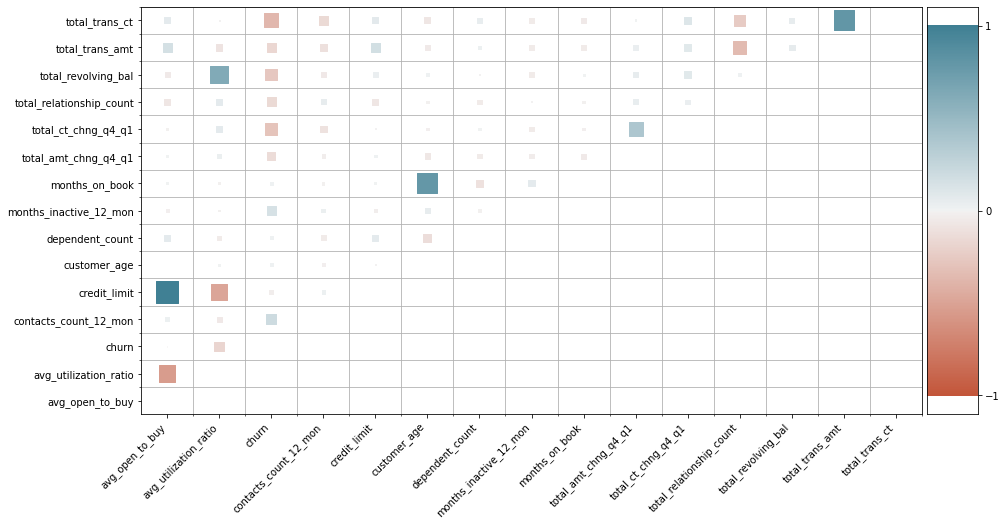

In [83]:
display_corr(dfa, clear='LowerRightDiagonal', display_table=False)

In [82]:
display_corr(dfa, clear='LowerRightDiagonal', display_table=False, static=False)

NOTE: the following non-numeric columns where not included in the plot:
	 ['gender', 'education_level', 'marital_status', 'income_category', 'card_category']

